In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway,chi2_contingency,normaltest,kruskal
import sys
import os
sys.path.append(os.path.abspath("../src"))

from utils.ClaseAbdon import DataFrameAnalyzer

In [2]:
course = pd.read_csv(r'..\data\raw\courses.csv')

In [3]:
df = course.copy()

In [4]:
df.shape

(641138, 22)

In [5]:
df.columns

Index(['index', 'Random', 'course_id', 'userid_DI', 'registered', 'viewed',
       'explored', 'certified', 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender',
       'grade', 'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act',
       'nplay_video', 'nchapters', 'nforum_posts', 'roles', 'incomplete_flag'],
      dtype='object')

### Descripción de las columnas del dataset

| Columna              | Descripción                                                                 |
|----------------------|------------------------------------------------------------------------------|
| `Random`             | Identificador numérico único asignado arbitrariamente a cada usuario.       |
| `registered`         | Indica si el usuario se registró en el curso.                               |
| `viewed`             | Indica si el estudiante visualizó el material del curso.                    |
| `explored`           | Indica si el usuario exploró más allá de lo requerido por su programa.      |
| `certified`          | Indica si el usuario completó exitosamente las pruebas para obtener un certificado. |
| `final_cc_cname_DI`  | Indica la ubicación geográfica del usuario.                                 |
| `LoE_DI`             | Nivel educativo alcanzado por el estudiante antes de inscribirse.           |
| `YoB`                | Año de nacimiento del estudiante.                                            |
| `gender`             | Sexo del estudiante (hombre o mujer).                                       |
| `grade`              | Puntuación numérica obtenida tras completar el curso.                       |
| `start_time_DI`      | Fecha en la que el estudiante comenzó el curso.                             |
| `last_event_DI`      | Fecha de la última actividad del estudiante en el curso.                    |
| `nevents`            | Número de interacciones del usuario con la plataforma.                      |
| `ndays_act`          | Número de días activos del usuario durante el curso.                        |
| `nchapters`          | Número de capítulos con los que interactuó el estudiante.                   |
| `nforum_posts`       | Número de publicaciones realizadas en los foros del curso.                  |
| `roles`              | Rol del usuario en el curso (por ejemplo, estudiante, instructor).          |
| `incomplete_flag`    | Indica si el estudiante dejó el curso incompleto.                           |


In [6]:
df.describe()

,index,Random,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,641138.000000,641138.000000,641138.0,641138.000000,641138.000000,641138.000000,544533.000000,441987.000000,478395.000000,183608.000000,382385.000000,641138.000000,0.0,100161.0
mean,320568.500000,50.427443,1.0,0.624299,0.061899,0.027587,1985.253279,431.008018,5.710254,114.844173,3.634423,0.018968,NaN,1.0
std,185080.742781,28.882656,0.0,0.484304,0.240973,0.163786,8.891814,1516.116057,11.866471,426.996844,4.490987,0.229539,NaN,0.0
min,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.0
25%,160284.250000,25.000000,1.0,0.000000,0.000000,0.000000,1982.000000,3.000000,1.000000,5.000000,1.000000,0.000000,NaN,1.0
50%,320568.500000,50.000000,1.0,1.000000,0.000000,0.000000,1988.000000,24.000000,2.000000,18.000000,2.000000,0.000000,NaN,1.0
75%,480852.750000,75.000000,1.0,1.000000,0.000000,0.000000,1991.000000,158.000000,4.000000,73.000000,4.000000,0.000000,NaN,1.0
max,641137.000000,100.000000,1.0,1.000000,1.000000,1.000000,2013.000000,197757.000000,205.000000,98517.000000,48.000000,20.000000,NaN,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              641138 non-null  int64  
 1   Random             641138 non-null  int64  
 2   course_id          641138 non-null  object 
 3   userid_DI          641138 non-null  object 
 4   registered         641138 non-null  int64  
 5   viewed             641138 non-null  int64  
 6   explored           641138 non-null  int64  
 7   certified          641138 non-null  int64  
 8   final_cc_cname_DI  641138 non-null  object 
 9   LoE_DI             535130 non-null  object 
 10  YoB                544533 non-null  float64
 11  gender             554332 non-null  object 
 12  grade              592766 non-null  object 
 13  start_time_DI      641138 non-null  object 
 14  last_event_DI      462184 non-null  object 
 15  nevents            441987 non-null  float64
 16  nd

In [8]:
df.sample(5)

,index,Random,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
561104,561104,40,MITx/14.73x/2013_Spring,MHxPC130054029,1,1,0,0,United States,Master's,...,0.1,2/12/2013,2/26/2013,540.0,5.0,84.0,2.0,0,NaN,NaN
177694,177694,24,HarvardX/CS50x/2012,MHxPC130278111,1,1,0,0,Other South Asia,NaN,...,0,11/22/2012,8/25/2013,248.0,21.0,NaN,2.0,0,NaN,NaN
374766,374766,86,MITx/6.00x/2012_Fall,MHxPC130340192,1,1,0,0,Brazil,NaN,...,0.01,8/16/2012,10/11/2012,477.0,6.0,84.0,3.0,0,NaN,NaN
331657,331657,34,HarvardX/PH207x/2012_Fall,MHxPC130420535,1,1,0,0,Egypt,Master's,...,NaN,8/2/2013,8/9/2013,46.0,2.0,26.0,2.0,0,NaN,NaN
505649,505649,7,MITx/6.00x/2012_Fall,MHxPC130580904,1,1,1,0,Other Europe,Bachelor's,...,0.02,12/6/2012,6/2/2013,5094.0,50.0,252.0,14.0,0,NaN,NaN


In [9]:
df.isna().sum()

index                     0
Random                    0
course_id                 0
userid_DI                 0
registered                0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI               106008
YoB                   96605
gender                86806
grade                 48372
start_time_DI             0
last_event_DI        178954
nevents              199151
ndays_act            162743
nplay_video          457530
nchapters            258753
nforum_posts              0
roles                641138
incomplete_flag      540977
dtype: int64

In [10]:
df_ob = df.select_dtypes('object')
for col in df_ob:
    print(f'==========={col}===========')
    print(f'Numero de unicos: {df[col].nunique()}')
    print(f'Valores Unicos: {df[col].unique()}')
    print('\n')

===========course_id===========
Numero de unicos: 16
Valores Unicos: ['HarvardX/CB22x/2013_Spring' 'HarvardX/CS50x/2012'
 'HarvardX/ER22x/2013_Spring' 'HarvardX/PH207x/2012_Fall'
 'HarvardX/PH278x/2013_Spring' 'MITx/6.002x/2012_Fall'
 'MITx/6.002x/2013_Spring' 'MITx/14.73x/2013_Spring'
 'MITx/2.01x/2013_Spring' 'MITx/3.091x/2012_Fall'
 'MITx/3.091x/2013_Spring' 'MITx/6.00x/2012_Fall' 'MITx/6.00x/2013_Spring'
 'MITx/7.00x/2013_Spring' 'MITx/8.02x/2013_Spring'
 'MITx/8.MReV/2013_Summer']


===========userid_DI===========
Numero de unicos: 476532
Valores Unicos: ['MHxPC130442623' 'MHxPC130275857' 'MHxPC130539455' ... 'MHxPC130184108'
 'MHxPC130359782' 'MHxPC130098513']


===========final_cc_cname_DI===========
Numero de unicos: 34
Valores Unicos: ['United States' 'France' 'Unknown/Other' 'Mexico' 'Australia' 'India'
 'Canada' 'Russian Federation' 'Other South Asia'
 'Other North & Central Amer., Caribbean' 'Other Europe' 'Other Oceania'
 'Japan' 'Other Africa' 'Colombia' 'Germany'
 'Other

In [11]:
df.drop(columns=['Random','index','grade','nforum_posts'],inplace=True)
# Variables no relevantes para el analísis.

In [12]:
df.rename(columns={'final_cc_cname_DI':'country',
                   'LoE_DI':'educational_achievement',
                   'YoB':'date_of_birth',
                   'nevents':'n_interaccion'},inplace=True)

In [13]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'],errors='coerce')
df['last_event_DI'] = pd.to_datetime(df['last_event_DI'],errors='coerce')
df['start_time_DI'] = pd.to_datetime(df['start_time_DI'],errors='coerce')

In [14]:
analyzer = DataFrameAnalyzer(df)

In [15]:
analyzer.resumen()

,Columna,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
0,course_id,object,16,0.00,0,0.00,Índice Numérico
1,userid_DI,object,476532,74.33,0,0.00,Índice Numérico
2,registered,int64,1,0.00,0,0.00,Numérica Discreta
3,viewed,int64,2,0.00,0,0.00,Binaria
4,explored,int64,2,0.00,0,0.00,Binaria
5,certified,int64,2,0.00,0,0.00,Binaria
6,country,object,34,0.01,0,0.00,Categórica Nominal
7,educational_achievement,object,5,0.00,106008,16.53,Categórica Nominal
8,date_of_birth,datetime64[ns],78,0.01,96605,15.07,Otro
9,gender,object,3,0.00,86806,13.54,Categórica Nominal


In [16]:
df.drop(columns=['nplay_video','nchapters','roles','date_of_birth',
                 'incomplete_flag','n_interaccion','ndays_act','registered'],inplace=True)
# Eliminamos columnas porque tienen una alta cantidad de nulos.

In [17]:
analyzer.describe_categorical()

,unique_values,most_frequent,frequency,proportion
course_id,16,HarvardX/CS50x/2012,169621,26.46
userid_DI,476532,MHxPC130027283,16,0.00
country,34,United States,184240,28.74
educational_achievement,5,Bachelor's,219768,41.07
gender,3,m,411520,74.24


In [18]:
analyzer.describe_numeric()

,count,mean,median,mode,std_dev,min,25%,50%,75%,max,skewness,kurtosis
viewed,641138.0,0.624299,1.0,1,0.484304,0.0,0.0,1.0,1.0,1.0,-0.513313,-1.736515
explored,641138.0,0.061899,0.0,0,0.240973,0.0,0.0,0.0,0.0,1.0,3.636113,11.221349
certified,641138.0,0.027587,0.0,0,0.163786,0.0,0.0,0.0,0.0,1.0,5.768677,31.277732


In [19]:
invalid_dates = df[df['last_event_DI'] < df['start_time_DI']]
print(f'Filas erroneas: {invalid_dates.shape[0]}')
df.loc[df['last_event_DI'] < df['start_time_DI'], ['last_event_DI', 'start_time_DI']] = \
df.loc[df['last_event_DI'] < df['start_time_DI'], ['start_time_DI', 'last_event_DI']].values

Filas erroneas: 1443


### Vemos que hay unas fechas incorrectas, la fecha final es despues de la fecha de comienzo. Las intercambiare.

## Tratamiento de valores nulos.

In [20]:
df.isna().sum()

course_id                       0
userid_DI                       0
viewed                          0
explored                        0
certified                       0
country                         0
educational_achievement    106008
gender                      86806
start_time_DI                   0
last_event_DI              178954
dtype: int64

In [21]:
df['educational_achievement'].value_counts()

educational_achievement
Bachelor's             219768
Secondary              169694
Master's               118189
Less than Secondary     14092
Doctorate               13387
Name: count, dtype: int64

In [22]:
df['educational_achievement'].fillna('Unknow',inplace=True)

# Imputamos los nulos con 'unknow', para no perder ninguna fila.

In [23]:
df['gender'].value_counts(normalize=True)

gender
m    0.742371
f    0.257598
o    0.000031
Name: proportion, dtype: float64

In [24]:
df['gender'].fillna((df['gender'].mode()[0]),inplace=True)

# Imputamos gender con la moda.

In [25]:
df.dropna(subset='last_event_DI',inplace=True)
# Eliminamos Totas las filas en la que este Nan 'las_event_DI'.

In [26]:
df['Total_days'] = (df['last_event_DI'] - df['start_time_DI']).dt.days
df['Total_days'] = df['Total_days'].apply(lambda x: 1 if x == 0 else x)

In [27]:
df.isna().sum()

course_id                  0
userid_DI                  0
viewed                     0
explored                   0
certified                  0
country                    0
educational_achievement    0
gender                     0
start_time_DI              0
last_event_DI              0
Total_days                 0
dtype: int64

In [28]:
def outliers(df, col, mode='detect'):
    """
    Detecta o elimina outliers usando el método IQR.

    Parámetros:
        df : DataFrame
        col : str - nombre de la columna numérica
        mode : str - 'detect' para obtener los outliers, 'remove' para eliminarlos

    Retorna:
        DataFrame con los outliers detectados o con los outliers eliminados
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    if mode == 'detect':
        return df[(df[col] < lower) | (df[col] > upper)]
    elif mode == 'remove':
        return df[(df[col] >= lower) & (df[col] <= upper)]
    else:
        raise ValueError("El parámetro 'mode' debe ser 'detect' o 'remove'")

In [29]:
num_vars = df.select_dtypes('int').columns

for var in num_vars:
    outl = outliers(df,var,'detect')
    print(f'Outliers en {var}: {len(outl)}')

Outliers en viewed: 0
Outliers en explored: 37641
Outliers en certified: 17675
Outliers en Total_days: 38074


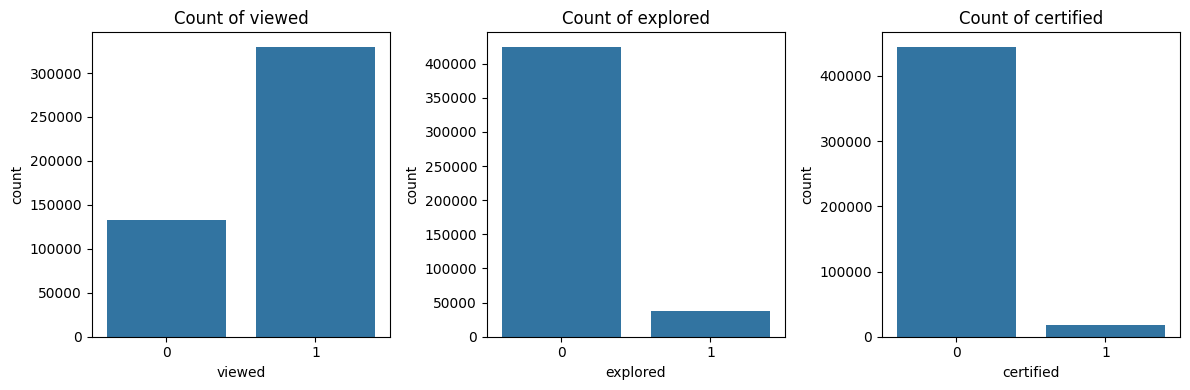

In [30]:
binary_vars = ['viewed', 'explored', 'certified']

fig, axes = plt.subplots(1, len(binary_vars), figsize=(12, 4))

for i, var in enumerate(binary_vars):
    sns.countplot(x=var, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {var}')

plt.tight_layout()
plt.show()

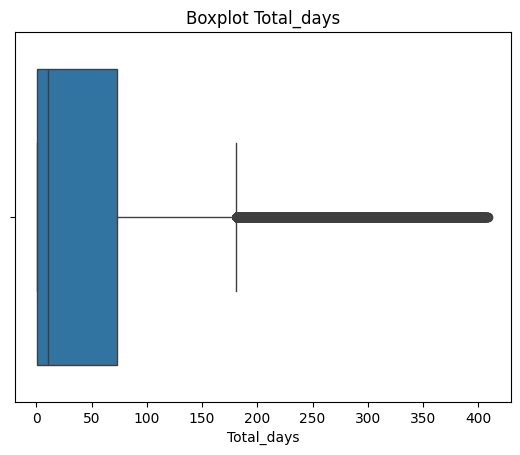

In [31]:
sns.boxplot(x=df['Total_days'])
plt.title("Boxplot Total_days")
plt.show();

In [32]:
df['active_engagement'] = (df['Total_days'] > 7) & (df['viewed'] == 1)

In [33]:
df_user = df.groupby('userid_DI').agg({
    'Total_days': 'mean',
    'active_engagement': 'mean',
    'viewed': 'max',
    'certified': 'max',
    'course_id': 'count'
}).rename(columns={'course_id': 'num_courses'})

print(f'Dimensiones de df agrupada por usuarios: {df_user.shape}')
df_user.head(5)

Dimensiones de df agrupada por usuarios: (362367, 5)


,Total_days,active_engagement,viewed,certified,num_courses
userid_DI,,,,,
MHxPC130000002,1.0,0.0,0,0,1
MHxPC130000004,186.0,1.0,1,1,2
MHxPC130000006,39.0,1.0,1,0,1
MHxPC130000007,23.0,1.0,1,0,1
MHxPC130000008,102.0,1.0,1,0,1


In [34]:
df_user.describe()

,Total_days,active_engagement,viewed,certified,num_courses
count,362367.000000,362367.000000,362367.000000,362367.000000,362367.000000
mean,47.267010,0.437969,0.749980,0.044739,1.275458
std,70.882378,0.477352,0.433025,0.206731,0.697536
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000
50%,11.000000,0.000000,1.000000,0.000000,1.000000
75%,68.000000,1.000000,1.000000,0.000000,1.000000
max,408.000000,1.000000,1.000000,1.000000,16.000000


In [35]:
df_user['num_courses'].value_counts()

num_courses
1     292949
2      49884
3      13191
4       4101
5       1287
6        501
7        192
8         78
9         54
10        29
11        28
14        26
13        16
12        15
15        11
16         5
Name: count, dtype: int64

#### Conclusiones sobre la vista por usuario único (df_user):

Aunque el enfoque principal del análisis es por inscripción a cursos (cada fila representa una participación), realicé un resumen complementario por usuario único para observar patrones agregados.

- En total, hay 362.367 usuarios únicos, y en promedio cada usuario ha tomado 1,27 cursos.

- La media de días activos por usuario es de 47 días, pero la mediana es solo de 11 días, lo que indica una gran asimetría: muchos usuarios abandonan rápido, y pocos permanecen por períodos largos (hay usuarios con más de 400 días activos).

- Solo el 4,47% de los usuarios se certificaron en al menos un curso.

- En cuanto al engagement, 43,8% de los usuarios únicos estuvieron activos en al menos un curso , mientras que el 74,9% visualizó al menos un curso , lo que indica que una parte significativa ve contenido pero no necesariamente se compromete activamente.

## Analísis Univariante

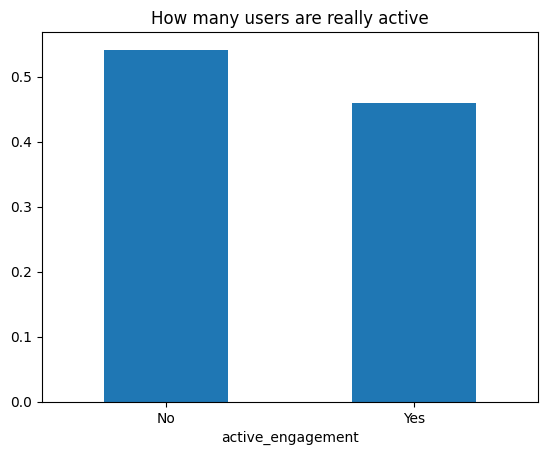

In [36]:
df['active_engagement'].value_counts(normalize=True).plot(kind='bar')
plt.title('How many users are really active')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0);

In [37]:
c = df['active_engagement'].mean() * 100
print(f"Porcentaje de usuarios con engagement activo: {c:.2f}%")

Porcentaje de usuarios con engagement activo: 45.86%


- La mayoría de los usuarios no alcanza un nivel de compromiso activo según la definición establecida. Aproximadamente solo el 45% de los usuarios pueden considerarse realmente activos, mientras que el 55% restante presenta un uso limitado o superficial de la plataforma.

In [38]:
total = len(df)
u_3_dias = len(df[(df['Total_days'] <= 3)])
u_3_dias_viewed = len(df[(df['Total_days'] <= 3) & (df['viewed'] == 1)])
porcentaje = (u_3_dias / total) * 100
porcentaje_viewed = (u_3_dias_viewed / total) * 100

print(f"{porcentaje:.2f}% de participaciones en los cursos dejaron de interactuar antes de 3 días activos.")
print(f"{porcentaje_viewed:.2f}% de participaciones en los cursos no vieron el material del curso y dejaron de interactuar antes de 3 días activos.")

43.91% de participaciones en los cursos dejaron de interactuar antes de 3 días activos.
22.34% de participaciones en los cursos no vieron el material del curso y dejaron de interactuar antes de 3 días activos.


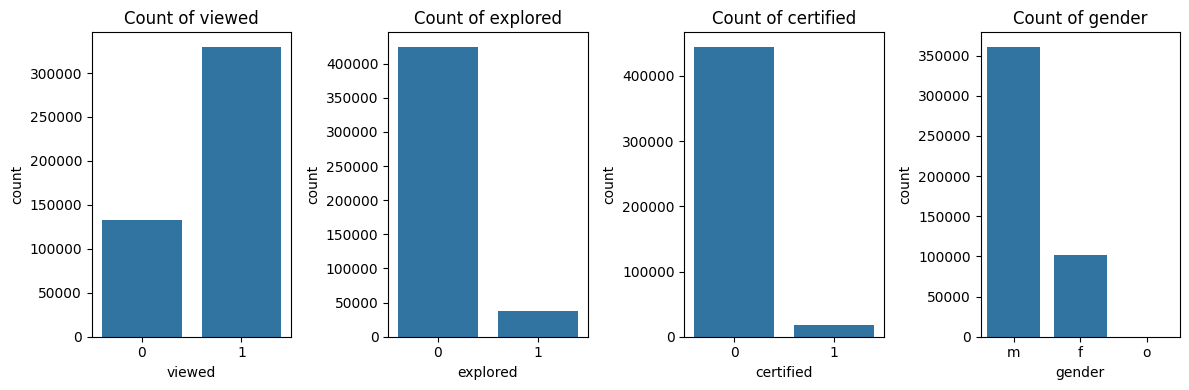

In [39]:
vars = ['viewed', 'explored', 'certified','gender']

fig, axes = plt.subplots(1, len(vars), figsize=(12, 4))

for i, var in enumerate(vars):
    sns.countplot(x=var, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {var}')

plt.tight_layout();

La mayoría de los usuarios ha visualizado al menos parte del contenido del curso (viewed = 1), pero solo una minoría exploró contenido adicional (explored = 1) y una proporción aún menor obtuvo certificación (certified = 1). Esto sugiere que, aunque el interés inicial en los cursos es alto, el compromiso profundo y la finalización exitosa son considerablemente más bajos, lo que puede indicar barreras en el seguimiento o finalización del curso. En cuanto al género, se observa una clara mayoría de usuarios identificados como masculinos (m), seguidos por mujeres (f) y un grupo muy reducido no especificado (o).

Este análisis refuerza la necesidad de identificar factores que impulsen la retención y el compromiso más allá del primer contacto con la plataforma.

In [40]:
test_vars = ['viewed', 'explored', 'certified']
for var in test_vars:
    table = pd.crosstab(df[var], df['active_engagement'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"\nTest: {var} vs active_engagement")
    print(f"Chi² = {chi2:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        print("Relación significativa ✅")
    else:
        print("No hay relación significativa ❌")



Test: viewed vs active_engagement
Chi² = 157070.92, p-value = 0.0000
Relación significativa ✅

Test: explored vs active_engagement
Chi² = 44076.66, p-value = 0.0000
Relación significativa ✅

Test: certified vs active_engagement
Chi² = 21212.61, p-value = 0.0000
Relación significativa ✅


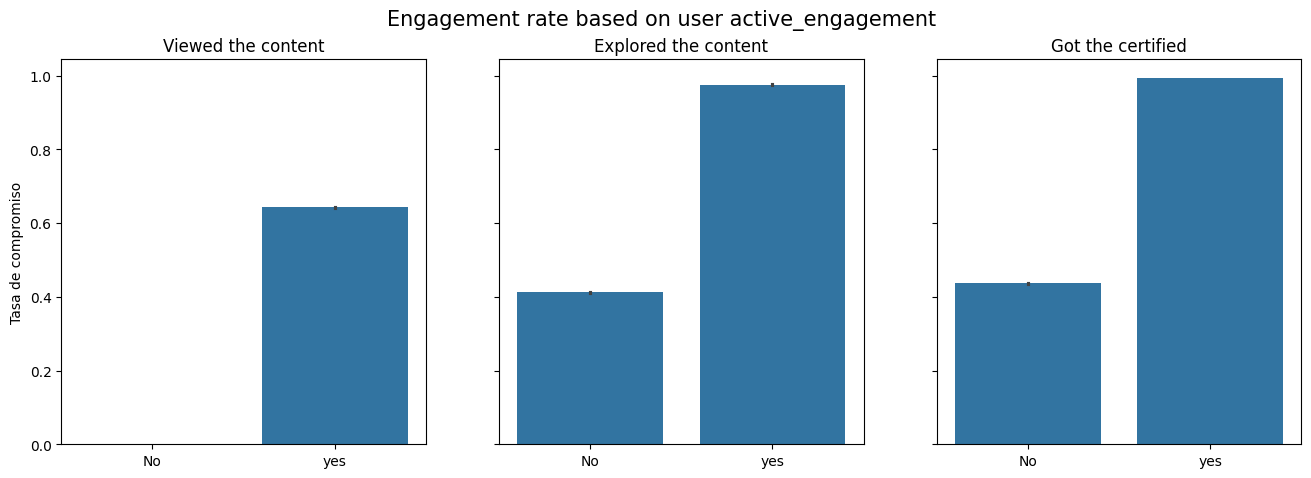

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

# Engagement por viewed
sns.barplot(x='viewed', y='active_engagement', data=df, ax=axes[0])
axes[0].set_title('Viewed the content')
axes[0].set_xticklabels(['No', 'yes'])
axes[0].set_ylabel('Tasa de compromiso')
axes[0].set_xlabel('')

# Engagement por explored
sns.barplot(x='explored', y='active_engagement', data=df, ax=axes[1])
axes[1].set_title('Explored the content')
axes[1].set_xticklabels(['No', 'yes'])
axes[1].set_ylabel('')
axes[1].set_xlabel('')

# Engagement por certified
sns.barplot(x='certified', y='active_engagement', data=df, ax=axes[2])
axes[2].set_title('Got the certified')
axes[2].set_xticklabels(['No', 'yes'])
axes[2].set_ylabel('')
axes[2].set_xlabel('')

plt.suptitle('Engagement rate based on user active_engagement', fontsize=15);

### Todas las variables (viewed, explored, certified) están significativamente asociadas con el compromiso del usuario (active_engagement):

- viewed vs active_engagement: los usuarios que visualizaron contenido tienen más probabilidades de estar comprometidos activamente que los que no lo hicieron.
- explored vs active_engagement: los usuarios que exploraron más allá del mínimo requerido tienen una probabilidad altísima de estar comprometidos.
- certified vs active_engagement:los usuarios que completan el curso y obtienen certificados están fuertemente asociados al compromiso activo.

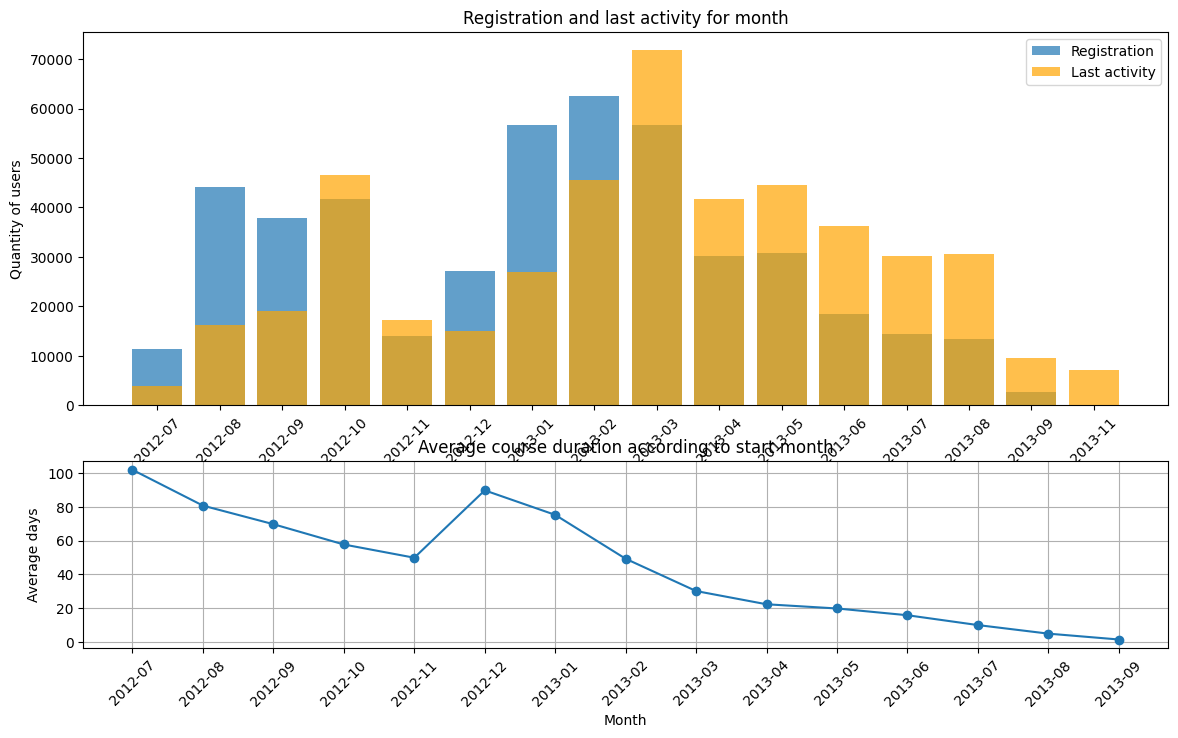

In [42]:
df['start_month'] = df['start_time_DI'].dt.to_period('M')
df['end_month'] = df['last_event_DI'].dt.to_period('M')

start_counts = df['start_month'].value_counts().sort_index()
end_counts = df['end_month'].value_counts().sort_index()
avg_duration = df.groupby('start_month')['Total_days'].mean()

fig, axes = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [2, 1]})

# Inscripciones por mes
axes[0].bar(start_counts.index.astype(str), start_counts.values, label='Registration', alpha=0.7)
axes[0].bar(end_counts.index.astype(str), end_counts.values, color='orange', label='Last activity', alpha=0.7)
axes[0].set_title('Registration and last activity for month')
axes[0].set_ylabel('Quantity of users')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Duración media
axes[1].plot(avg_duration.index.astype(str), avg_duration.values, marker='o', linestyle='-')
axes[1].set_title('Average course duration according to start month')
axes[1].set_ylabel('Average days')
axes[1].set_xlabel('Month')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45);

In [43]:
stat, p = normaltest(df['Total_days'])
if p < 0.05:
    print(f"P-valor: {p} -> No es normal")
else:
    print(f"P-valor: {p} -> Distribución normal")

P-valor: 0.0 -> No es normal


In [44]:
grouped = df.groupby('start_month')
durations_by_month = [group['Total_days'].values for name, group in grouped if len(group) > 1000]

stat, p = kruskal(*durations_by_month)
print(f"Kruskal-Wallis: Estadístico = {stat:.2f}, p = {p:.4f}")

Kruskal-Wallis: Estadístico = 51493.14, p = 0.0000


- Existe una diferencia estadísticamente significativa en la duración de uso de la plataforma según el mes de inscripción. Esto sugiere que factores temporales (como época del año, disponibilidad, estacionalidad educativa, vacaciones, etc.) podrían estar influyendo en el engagement de los usuarios.

In [45]:
df['start_quarter'] = df['start_time_DI'].dt.to_period('Q')

table = pd.crosstab(df['start_quarter'], df['certified'])
chi2, p, dof, _ = chi2_contingency(table)

print("Chi2 =", chi2, "p-value =", p)

Chi2 = 2221.9944657400392 p-value = 0.0


- Existe una asociación significativa entre el trimestre de inicio y la probabilidad de obtener un certificado. Esto sugiere que la época del año en que los usuarios se inscriben influye en su éxito en completar el curso. Puede estar relacionado con motivación estacional, carga académica, tiempo disponible, etc.

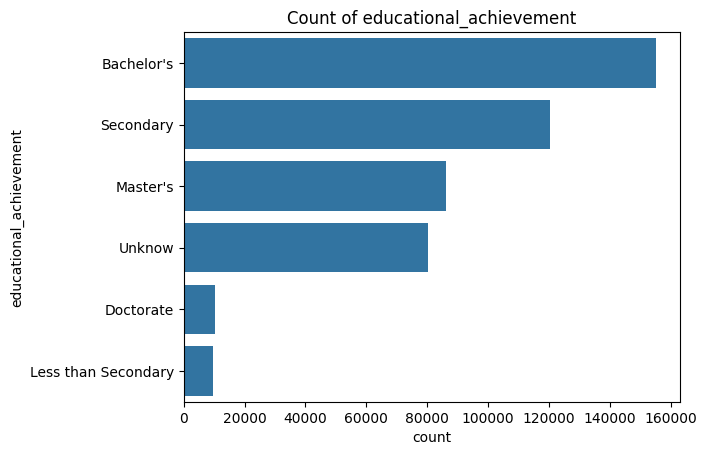

In [46]:
sns.countplot(y='educational_achievement', data=df, order=df['educational_achievement'].value_counts().index)
plt.title('Count of educational_achievement');

In [47]:
groups = [df[df['educational_achievement'] == level]['Total_days'] for level in df['educational_achievement'].unique()]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis: Estadístico = {stat:.2f}, p = {p:.4f}")

Kruskal-Wallis: Estadístico = 2993.77, p = 0.0000


- La duración media del uso de la plataforma varía significativamente según el nivel educativo del usuario. Esto sugiere que factores como experiencia académica o hábitos de estudio pueden estar influyendo en el tiempo de permanencia en los cursos.

In [48]:
table = pd.crosstab(df['educational_achievement'], df['active_engagement'])
chi2, p, dof, _ = chi2_contingency(table)

print("Chi2 =", chi2, "p =", p)

Chi2 = 2212.4193456160065 p = 0.0


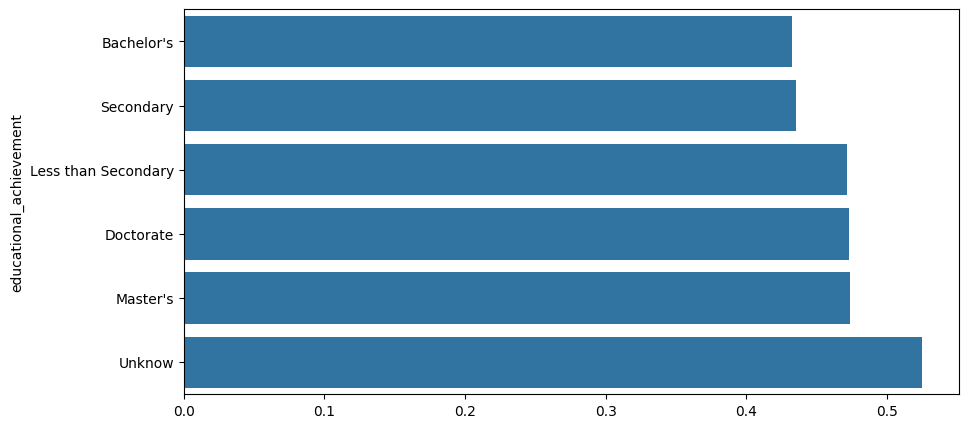

In [49]:
engagement_rate = df.groupby('educational_achievement')['active_engagement'].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=engagement_rate.values, y=engagement_rate.index);

- El compromiso activo de los usuarios está significativamente asociado con su nivel educativo previo, como lo confirma el test Chi-cuadrado. Esto implica que ciertos niveles educativos presentan una mayor proporción de usuarios comprometidos, lo cual puede tener implicaciones en cómo se personalizan los contenidos o se definen enfoques estratégicos.

- Como se observa en el gráfico, usuarios con estudios de posgrado (Master’s y Doctorate) muestran tasas de compromiso ligeramente superiores, mientras que el grupo con nivel "Unknown" sorprendentemente presenta la tasa más alta. Esto podría indicar que existen segmentos con comportamientos atípicos que vale la pena investigar más a fondo (por ejemplo, usuarios que no completaron su perfil, pero sí utilizaron activamente la plataforma).

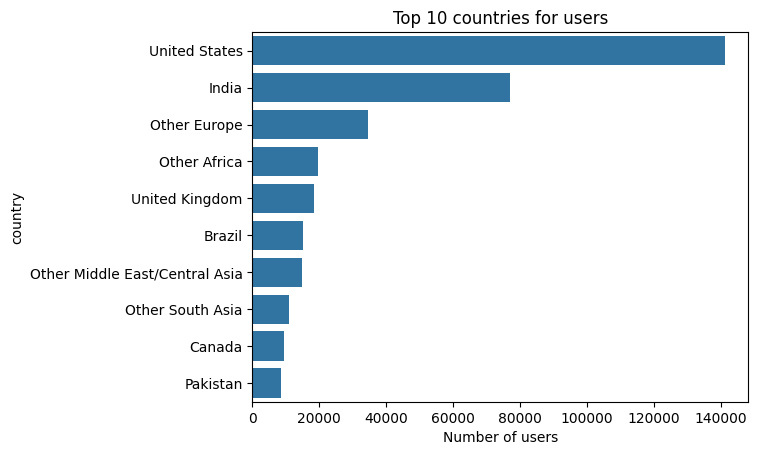

In [50]:
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 countries for users')
plt.xlabel('Number of users');

- Vemos que la gran mayoria de los usuarios son USA, India y Unknow.

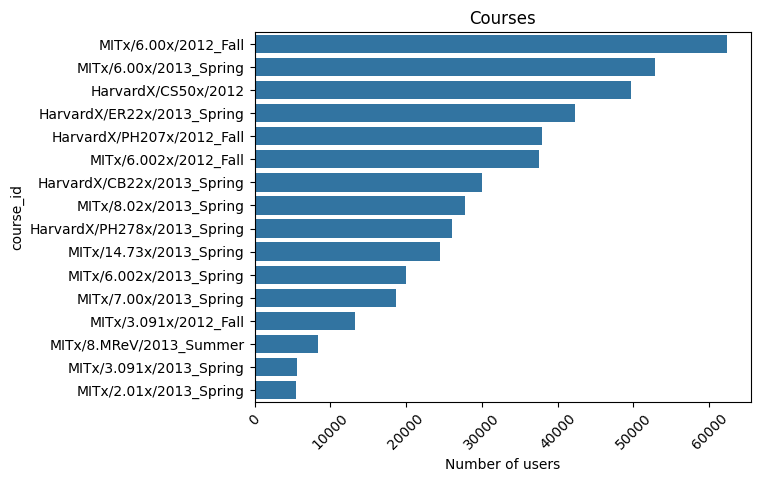

In [51]:
top_courses = df['course_id'].value_counts()
sns.barplot(x=top_courses.values, y=top_courses.index)
plt.title('Courses')
plt.tick_params(axis='x', rotation=45)
plt.xlabel('Number of users');

In [52]:
df.groupby('course_id')['active_engagement'].mean().sort_values(ascending=False)

course_id
MITx/2.01x/2013_Spring         0.563942
HarvardX/CS50x/2012            0.556481
MITx/7.00x/2013_Spring         0.503168
MITx/8.02x/2013_Spring         0.496279
HarvardX/ER22x/2013_Spring     0.483748
MITx/8.MReV/2013_Summer        0.482767
MITx/6.00x/2012_Fall           0.469526
MITx/14.73x/2013_Spring        0.461513
HarvardX/PH278x/2013_Spring    0.459061
MITx/3.091x/2013_Spring        0.451677
HarvardX/PH207x/2012_Fall      0.441082
MITx/6.00x/2013_Spring         0.431058
MITx/6.002x/2012_Fall          0.423803
MITx/3.091x/2012_Fall          0.397170
HarvardX/CB22x/2013_Spring     0.358943
MITx/6.002x/2013_Spring        0.353989
Name: active_engagement, dtype: float64

In [53]:
table = pd.crosstab(df['course_id'], df['active_engagement'])
chi2, p, _, _ = chi2_contingency(table)
print("Chi2 =", chi2, "p =", p)

Chi2 = 5297.618834525356 p = 0.0


- El test Chi-cuadrado muestra una relación estadísticamente significativa entre el curso (course_id) y el compromiso activo del usuario (active_engagement). Esto significa que el nivel de engagement no es igual en todos los cursos y que el tipo de curso tiene un impacto relevante en el comportamiento de los usuarios.

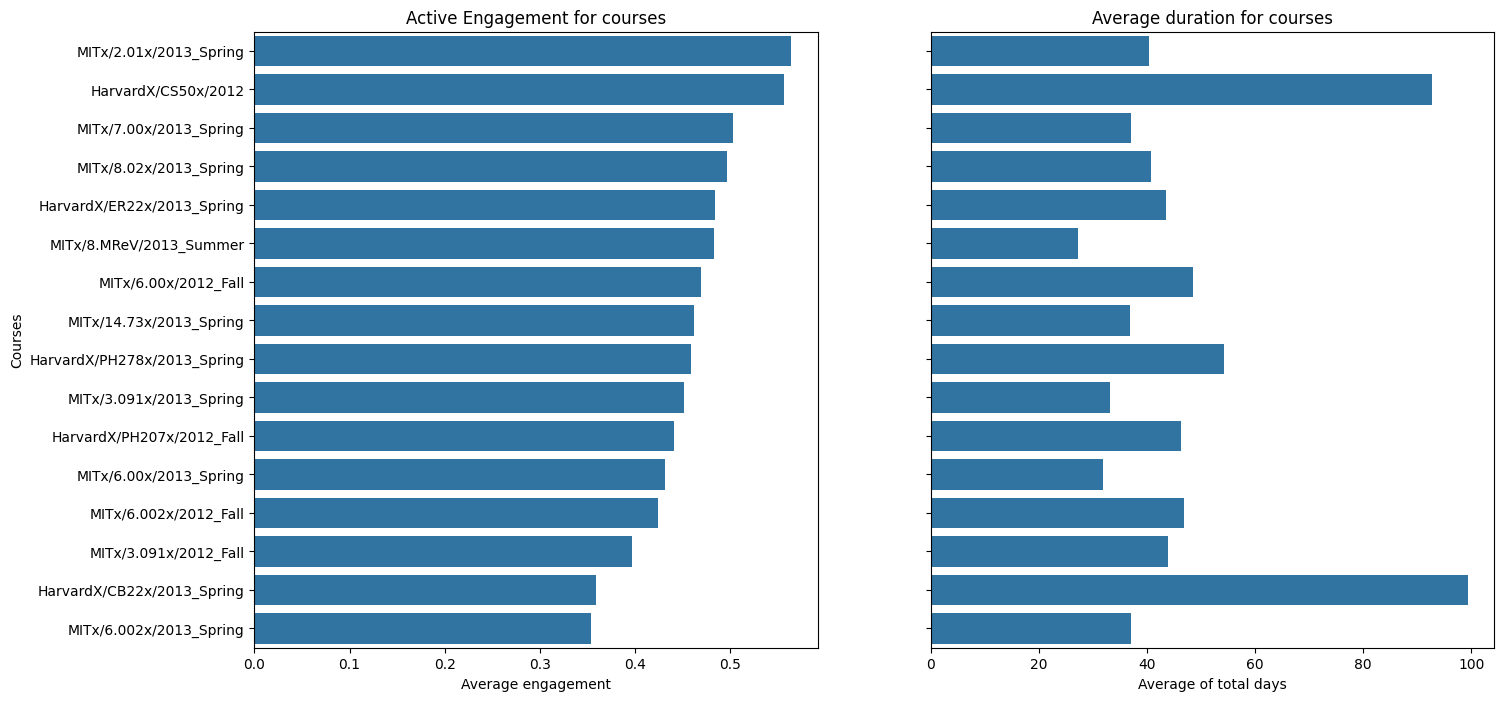

In [54]:
course_act = df.groupby('course_id')['active_engagement'].mean().sort_values(ascending=False)
course_totald = df.groupby('course_id')['Total_days'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Active engagement
sns.barplot(ax=axes[0], y=course_act.index, x=course_act.values)
axes[0].set_title('Active Engagement for courses')
axes[0].set_xlabel('Average engagement')
axes[0].set_ylabel('Courses')

# Total days
sns.barplot(ax=axes[1], y=course_totald.index, x=course_totald.values)
axes[1].set_title('Average duration for courses')
axes[1].set_xlabel('Average of total days')
axes[1].set_ylabel('');

#### Al comparar la tasa de engagement activo con la duración promedio de los cursos, se evidencian patrones interesantes:

- MITx/2.01x/2013_Spring y HarvardX/CS50x/2012 destacan por tener las tasas de engagement más altas, lo que sugiere que una gran proporción de sus usuarios interactuó activamente. Sin embargo, en el caso del curso de Harvard, también se observa que tiene la mayor duración promedio, lo que indica que sus usuarios permanecieron activos durante más tiempo. Esto puede reflejar un curso extenso.

- En contraste, otros cursos como HarvardX/CB22x/2013_Spring muestran una duración media extremadamente alta pero una de las tasas de engagement más bajas, lo que sugiere que, aunque los usuarios pasaron mucho tiempo inscritos, no necesariamente se mantuvieron activos o comprometidos.

- También se observa que algunos cursos de MIT con alta duración promedio, como MITx/6.00x/2012_Fall, tienen un compromiso intermedio, lo cual puede reflejar que aunque el contenido es exigente o extenso, no todos los usuarios lo exploran de forma activa.

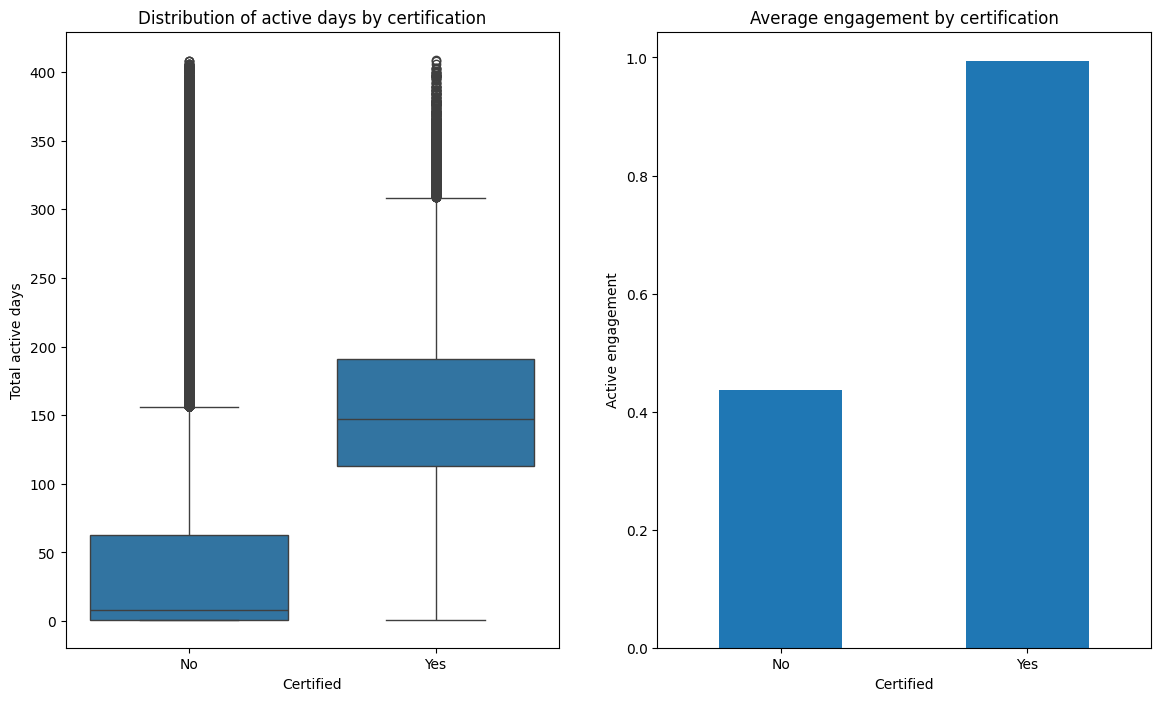

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Boxplot de días activos
sns.boxplot(x='certified', y='Total_days', data=df, ax=axes[0], order=[0, 1])
axes[0].set_title('Distribution of active days by certification')
axes[0].set_xlabel('Certified')
axes[0].set_ylabel('Total active days')
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Barplot de engagement promedio
df.groupby('certified')['active_engagement'].mean().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Average engagement by certification')
axes[1].set_xlabel('Certified')
axes[1].set_ylabel('Active engagement')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0);

- Los usuarios que obtienen la certificación no solo tienen una tasa de engagement mucho mayor, sino que también permanecen significativamente más tiempo activos en la plataforma. Esto se ve tanto en la media de días activos, como en la distribución completa, que evidencia una mayor concentración de actividad sostenida entre los usuarios certificados.

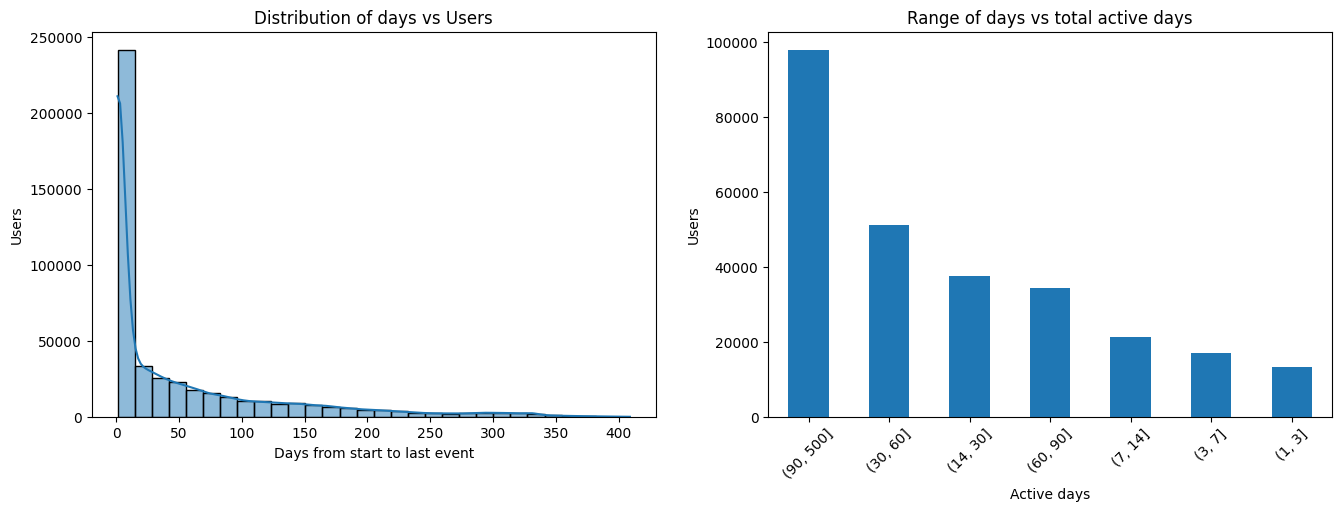

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df['Total_days'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of days vs Users')
axes[0].set_xlabel('Days from start to last event')
axes[0].set_ylabel('Users')

df['days_bucket'] = pd.cut(df['Total_days'], bins=[1, 3, 7, 14, 30, 60, 90, 500])
df['days_bucket'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Range of days vs total active days')
axes[1].set_xlabel('Active days')
axes[1].set_ylabel('Users')
axes[1].tick_params(axis='x', rotation=45);

In [57]:
b = (df['Total_days'] <= 3).mean() * 100
print(f"Porcentaje de usuarios que abandonaron en ≤ 3 días: {b:.2f}%")

Porcentaje de usuarios que abandonaron en ≤ 3 días: 43.91%


#### Ambas gráficas reflejan una fuerte tendencia al abandono temprano en la plataforma:

- El histograma con KDE lo confirma: hay un pico muy pronunciado en los primeros días, seguido de una caída exponencial.
- La gran mayoria de los usuarios abandonan entre el dia 1 y 3 de los cursos, como se observa en la curva.

Estos datos sugieren que el onboarding y las primeras interacciones son cruciales para la retención. Mejorar la experiencia inicial podría tener un impacto directo en reducir el abandono temprano y aumentar el engagement sostenido.

-------------------------------------------------

## Resumen del Proceso

- Dataset con más de 600.000 usuarios.
- Limpieza y renombramiento de columnas para claridad.
- Creación de variables clave: `active_engagement`, `start_month`, `Total_days`, entre otras.
- Evaluación de relaciones entre comportamiento del usuario, nivel educativo y características de los cursos.
- Visualizaciones para entender mejor el abandono y la retención.

---

## Principales Insights

### 1. **Engagement general**

- Solo el **45% de los usuarios mostraron un compromiso activo** (más de 7 días activos y visualización de contenido).
- Las variables `viewed`, `explored` y `certified` están fuertemente asociadas con usuarios realmente activos (`p < 0.0001` en todos los casos, según test `chi2`).
  
### 2. **Curva de abandono**

- La mayoría de los usuarios abandonan en los primeros días:
  - El **43% de los usuarios dejaron de interactuar antes de 3 días activos (algunos no llegaron a ver el material del curso)**.
  - Distribuciones con `Total_days` muestran picos de abandono muy tempranos.
  
> **Interpretación:** mejorar la experiencia inicial podría impactar directamente en la retención.

---

### 3. **Mes de inicio**

- El mes de inscripción tiene una relación clara con la duración del engagement.
- Los usuarios que se registraron en los primeros meses (2012) tuvieron, en promedio, una duración mayor.
- A medida que avanzan los meses, la duración del uso tiende a disminuir.

---

### 4. **Nivel educativo**

- Hay una **relación significativa entre el nivel educativo y el engagement** (`chi2`, `Kruskal`, ambos con p < 0.0001).
- Los usuarios con educación superior (máster, doctorado) tienen mayores tasas de compromiso.

---

### 5. **Certificación y duración**

- Las personas que obtienen un certificado permanecen activas por más días y tienen mayor tasa de engagement.
- Se comprobó visualmente (boxplot y barplot) y con tests estadísticos.

---

### 6. **Cursos**

- El curso más popular (`MITx/6.00x/2012_Fall`) es el que más usuarios tuvo, pero no entró en el top 5 de cursos con mas engagement.
- Por otro lado, cursos como `MITx/2.01x/2013_Spring` y `HarvardX/CS50x/2012` lograron altísimo engagement, el primero no estaba entre los mas populares (el último), y el segundo si que entro en el top 3 de mas populares.
- Comparación cruzada de duración promedio y tasa de engagement reveló que **más duración no garantiza más compromiso**.

---

## 📌 Conclusión general

- El mayor desafío no está en atraer usuarios, sino en **retenerlos durante los primeros días**.
- Hay una desconexión clara entre popularidad de los cursos y compromiso real.
- El compromiso se ve afectado positivamente por:
  - Visualización de contenido
  - Exploración adicional
  - Finalización del curso (certificación)
  - Nivel educativo previo
- Las curvas de abandono y duración evidencian la necesidad de fortalecer el onboarding y estrategias personalizadas de motivación.